In [6]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

# %matplotlib inline
# %matplotlib notebook
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from global_import import *

In [4]:
data = pd.read_csv(f'{DATA_FOLDER}/lagged_comp-fundr-ibes_for_val_1976-2019.csv', index_col = 0)
data = data.replace([np.inf, -np.inf], np.nan)
# train val split: 1979-2009 train, 2010-2019 test
tr = data.loc[(1979 <= data['year']) & (data['year'] <= 2009)]
ts = data.loc[(2010 <= data['year']) & (data['year'] <= 2019)]

In [7]:
n_components = 4
# OOS R2 with y > 1
for yr in [1,2,3,4,5]:
    tryr = tr.dropna(subset = [f'ni_{yr}'])
    tsyr = ts.dropna(subset = [f'ni_{yr}'])
    X_tr = tryr.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
    y_tr = tryr[f'ni_{yr}']

    X_tr = X_tr.fillna(0).astype(float)

    y_tr = y_tr.astype(float)
    X_ts = tsyr[tsyr[f'ni_{yr}'] >= 1].drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1).fillna(0).astype(float)
    y_ts = tsyr[tsyr[f'ni_{yr}'] >= 1][f'ni_{yr}'].astype(float)


    print(yr, X_tr.shape, y_tr.shape, X_ts.shape, y_ts.shape)

    pls = PLSRegression(n_components = n_components)
    print(f"{datetime.now()} Fitting PLS regr{yr} start!")
    pls.fit(X_tr, y_tr)
    print(f"{datetime.now()} Fitting PLS regr{yr} done!")
    yhat_ts = pls.predict(X_ts)
    out_r2 = r2_score(y_ts, yhat_ts)
    print(yr, out_r2)
    X_tr_std = X_tr.std()
    pls_varimp = pls.coef_[:,0] * X_tr_std
    sns.set(rc={'figure.figsize':(15,6)})
    sns.palplot(sns.color_palette("BuGn", 10))
    ax1 = sns.barplot(x=np.asarray(list(pls_varimp.keys()))[np.abs(pls_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls_varimp)[np.abs(pls_varimp).argsort()[-15:][::-1]]))
    plt.savefig(f'fig_{yr}.png', dpi=100, bbox_inches='tight')

1 (172500, 301) (172500,) (30247, 301) (30247,)
2020-10-24 15:37:48.299225 Fitting PLS regr1 start!
2020-10-24 15:37:50.123643 Fitting PLS regr1 done!
1 0.6802832484932435


<IPython.core.display.Javascript object>

2 (157984, 301) (157984,) (25927, 301) (25927,)
2020-10-24 15:37:51.694767 Fitting PLS regr2 start!
2020-10-24 15:37:53.625031 Fitting PLS regr2 done!
2 0.6360916028292534


<IPython.core.display.Javascript object>

3 (144921, 301) (144921,) (21883, 301) (21883,)
2020-10-24 15:37:55.208824 Fitting PLS regr3 start!
2020-10-24 15:37:56.880616 Fitting PLS regr3 done!
3 0.6160598023875656


<IPython.core.display.Javascript object>

4 (133344, 301) (133344,) (18243, 301) (18243,)
2020-10-24 15:37:58.356269 Fitting PLS regr4 start!
2020-10-24 15:38:00.005561 Fitting PLS regr4 done!
4 0.5988381269612084


<IPython.core.display.Javascript object>

5 (123038, 301) (123038,) (14888, 301) (14888,)
2020-10-24 15:38:01.356815 Fitting PLS regr5 start!
2020-10-24 15:38:02.741693 Fitting PLS regr5 done!
5 0.5344357666030579


<IPython.core.display.Javascript object>

In [8]:
tr2 = tr.dropna(subset = ['ni_2'])

X_tr2 = tr2.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
y_tr2 = tr2['ni_2']
X_tr2 = X_tr2.fillna(0).astype(float)
X_ts2 = X_ts2.fillna(0).astype(float)

y_tr2 = y_tr2.astype(float)

NameError: name 'X_ts2' is not defined

In [12]:
pls2 = PLSRegression(n_components = 4)
pls2_out = pls2.fit(X_tr2, y_tr2)

In [13]:
X_tr2_std = X_tr2.std()
pls2_varimp = pls2_out.coef_[:,0] * X_tr2_std

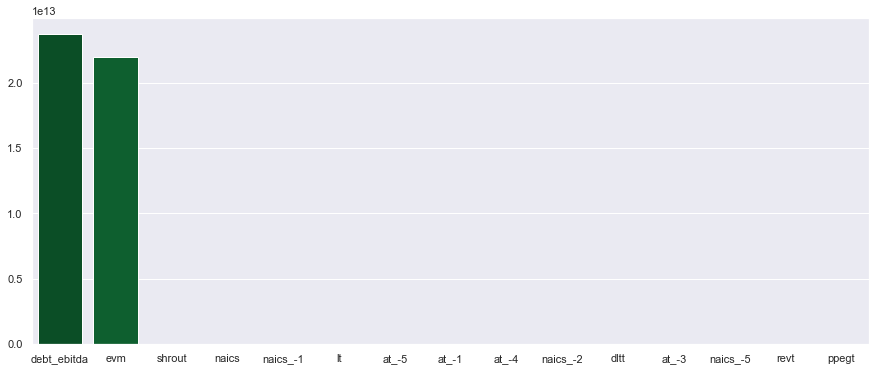

In [24]:
sns.set(rc={'figure.figsize':(15,6)})
# sns.color_palette("Blues_r")
ax1 = sns.barplot(x=np.asarray(list(pls2_varimp.keys()))[np.abs(pls2_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls2_varimp)[np.abs(pls2_varimp).argsort()[-15:][::-1]]), palette = 'BuGn_r')

2020-10-22 19:02:58.806255 Fitting PLS regr1 start!
2020-10-22 19:03:02.190864 Fitting PLS regr1 done!
2020-10-22 19:03:03.860520 Fitting PLS regr2 start!
2020-10-22 19:03:07.144892 Fitting PLS regr2 done!
2020-10-22 19:03:08.689720 Fitting PLS regr3 start!
2020-10-22 19:03:11.744394 Fitting PLS regr3 done!
2020-10-22 19:03:13.195137 Fitting PLS regr4 start!
2020-10-22 19:03:15.945717 Fitting PLS regr4 done!
2020-10-22 19:03:17.318063 Fitting PLS regr5 start!
2020-10-22 19:03:19.826340 Fitting PLS regr5 done!


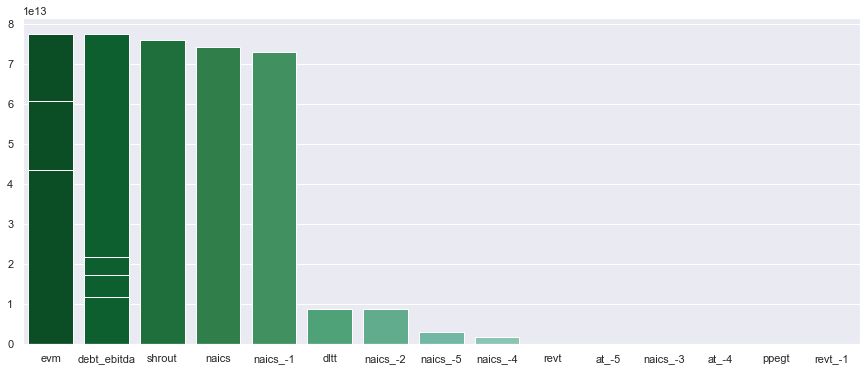

In [26]:
n_components = 4
# variable importance
for yr in [1,2,3,4,5]:
    tryr = tr.dropna(subset = [f'ni_{yr}'])
    X_tr = tryr.drop(['ticker', 'exchcd', 'permno','jdate','year','ni_1', 'ni_2', 'ni_3','ni_4','ni_5'], axis = 1)
    y_tr = tryr[f'ni_{yr}']

    X_tr = X_tr.fillna(0).astype(float)

    y_tr = y_tr.astype(float)
  

    pls = PLSRegression(n_components = n_components)
    print(f"{datetime.now()} Fitting PLS regr{yr} start!")
    pls.fit(X_tr, y_tr)
    print(f"{datetime.now()} Fitting PLS regr{yr} done!")
    X_tr_std = X_tr.std()
    pls_varimp = pls.coef_[:,0] * X_tr_std
    sns.set(rc={'figure.figsize':(15,6)})

    ax1 = sns.barplot(x=np.asarray(list(pls_varimp.keys()))[np.abs(pls_varimp).argsort()[-15:][::-1]], 
                               y=(np.abs(pls_varimp)[np.abs(pls_varimp).argsort()[-15:][::-1]]), palette = 'BuGn_r')
    plt.savefig(f'pls_{yr}.png', bbox_inches='tight')